Identify the output variable.
Understand the type of data.
Check if there are any biases in your dataset.
Check whether all members of the house have the same poverty level.
Check if there is a house without a family head.
Set poverty level of the members and the head of the house within a family.
Count how many null values are existing in columns.
Remove null value rows of the target variable.
Predict the accuracy using random forest classifier.
Check the accuracy using random forest with cross validation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [7]:
df_train.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

In [8]:
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [13]:
df_train['Target'].unique()

array([4, 2, 3, 1], dtype=int64)

In [19]:
print('integer:')
print(df_train.select_dtypes('int64').columns)
print('float:')
print(df_train.select_dtypes('float64').columns)
print('object:')
print(df_train.select_dtypes('object').columns)

integer:
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)
float:
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')
object:
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [24]:
null=df_train.select_dtypes('int64').isnull().sum()
null[null>0]

Series([], dtype: int64)

In [27]:
df_train.select_dtypes('int64').head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4


In [28]:
df_train.select_dtypes('float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [32]:
df_train.select_dtypes('float64').isnull().sum()

v2a1               6860
v18q1              7342
rez_esc            7928
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64

In [33]:
df_train.select_dtypes('object').isnull().sum()

Id            0
idhogar       0
dependency    0
edjefe        0
edjefa        0
dtype: int64

In [35]:
df_train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


object datatype is having mixed values
float datatype has null values
lets clean the data

dependency, Dependency rate, calculated = (number of members of the household
younger than 19 or older than 64)/(number of member of household between 19 and 64)

edjefe, years of education of male head of household, based on the interaction of
escolari (years of education), head of household and gender, yes=1 and no=0

edjefa, years of education of female head of household, based on the interaction of
escolari (years of education), head of household and gender, yes=1 and no=0


In [42]:
mapping={'yes':1,'no':0}
for df in [df_train,df_test]:
    df['dependency']=df['dependency'].replace(mapping).astype(np.float64)
    df['edjefe']=df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa']=df['edjefa'].replace(mapping).astype(np.float64)
df_train[['dependency','edjefe','edjefa']].describe()  

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


null values
v2a1 : Monthly rent payment
v18q1  : number of tablets household owns
rez_esc : Years behind in school
meaneduc : average years of education for adults (18+)
SQBmeaned  : square of the mean years of education of adults (>=18) in the household 142

tipovivi1, =1 own and fully paid house
tipovivi2, "=1 own, paying in installments"
tipovivi3, =1 rented
tipovivi4, =1 precarious
tipovivi5, "=1 other(assigned, borrowed)

In [45]:
data=df_train[df_train['v2a1'].isnull()].head()
columns=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
data[columns]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


Text(0.5, 1.0, 'Home Ownership Status for Households Missing Rent Payments')

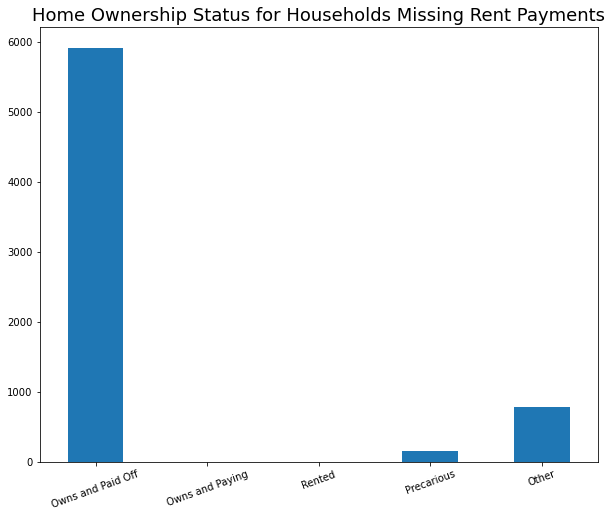

In [50]:
variables = [x for x in df_train if x.startswith('tipo')]
df_train.loc[df_train['v2a1'].isnull(),variables].sum().plot.bar(figsize=(10,8))
plt.xticks([0, 1, 2, 3, 4],['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],rotation = 20)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18)

In [53]:
for df in [df_test,df_train]:
    df['v2a1'].fillna(value=0, inplace=True)
df_train[['v2a1']].isnull().sum()    

v2a1    0
dtype: int64

v18q1  : number of tablets household owns

In [54]:
for df in [df_train, df_test]:
    df['v18q1'].fillna(value=0, inplace=True)

df_train[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

rez_esc : Years behind in school

In [56]:
df_train[df_train['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [57]:
df_train[df_train['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [59]:
df_train.loc[(df_train['rez_esc'].isnull()&((df_train['age']>7)&(df_train['age']<17)))]['age'].describe()

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

In [60]:
df_train[(df_train['age'] ==10) & df_train['rez_esc'].isnull()].head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,...,0,100,9,121,1,2.25,0.25,182.25,100,4


In [62]:
for df in [df_test,df_train]:
    df['rez_esc'].fillna(value=0, inplace=True)
df_train[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

meaneduc : average years of education for adults (18+)

In [63]:
data = df_train[df_train['meaneduc'].isnull()].head()

columns=['edjefe','edjefa','instlevel1','instlevel2']
data[columns][data[columns]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [64]:
for df in [df_test,df_train]:
    df['meaneduc'].fillna(value=0, inplace=True)
df_train[['meaneduc']].isnull().sum()

meaneduc    0
dtype: int64

SQBmeaned  : square of the mean years of education of adults (>=18) in the household 142

In [66]:
data=df_train[df_train['c'].isnull()].head()
columns=['edjefe','edjefa','instlevel1','instlevel2']
data[columns][data[columns]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [67]:
for df in [df_test,df_train]:
    df['SQBmeaned'].fillna(value=0, inplace=True)
df_train[['SQBmeaned']].isnull().sum()

SQBmeaned    0
dtype: int64

In [69]:
null=df_train.isnull().sum()
null[null>0].sort_values(ascending =False)

Series([], dtype: int64)

Groupby the household and figure out the number of unique values
Check whether all members of the house have the same poverty level.

In [74]:
all_equal=df_train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)
not_equal=all_equal[all_equal !=True]
print(len(not_equal))

85


In [75]:
df_train[df_train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


Check if there is a house without a family head

In [89]:
households_head = df_train.groupby('idhogar')['parentesco1'].sum()
households_no_head=df_train.loc[df_train['idhogar'].isin(households_head[households_head==0].index)]
print(households_no_head['idhogar'].nunique())

15


In [85]:
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different Target value.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different Target value.


In [90]:
for household in not_equal.index:
    true_target = int(df_train[(df_train['idhogar'] == household) & (df_train['parentesco1'] == 1.0)]['Target'])
    df_train.loc[df_train['idhogar'] == household, 'Target'] = true_target
all_equal = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


In [92]:
target=df_train['Target'].value_counts()
target

4    6004
2    1558
3    1221
1     774
Name: Target, dtype: int64

<AxesSubplot:>

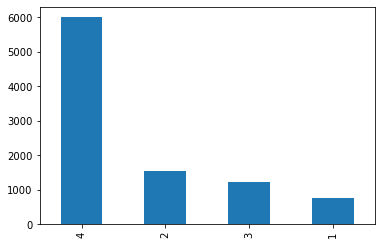

In [94]:
target.plot.bar()

In [95]:
cols = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

for df in [df_train, df_test]:
    df.drop(columns=cols, inplace=True)

print(df_train.shape, df_test.shape)

(9557, 134) (23856, 133)


In [97]:
heads = df_train.loc[df_train['parentesco1'] == 1]
heads.shape

(2973, 134)

In [98]:
corr_matrix = heads.corr()
corr_matrix

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
v2a1,1.000000,-0.022945,0.096752,-0.021961,0.024083,0.045291,0.179476,0.202622,0.025942,-0.029886,...,0.168408,-0.039600,-0.023930,-0.077042,-0.090304,-0.067789,0.141330,-0.141330,-0.205431,0.166112
hacdor,-0.022945,1.000000,-0.181283,0.624324,-0.143713,-0.055073,-0.061309,-0.056616,0.186709,0.057368,...,-0.029605,0.010581,0.026791,-0.010283,0.025574,0.001103,0.025404,-0.025404,-0.090660,-0.136275
rooms,0.096752,-0.181283,1.000000,-0.172382,0.136410,0.158394,0.263738,0.271945,-0.039824,0.232702,...,0.210526,-0.069091,-0.132380,-0.028103,-0.097762,-0.055276,0.126715,-0.126715,0.189562,0.201019
hacapo,-0.021961,0.624324,-0.172382,1.000000,-0.154749,-0.062110,-0.051432,-0.045953,0.174432,0.088729,...,-0.032999,0.018682,0.007766,0.000237,0.007112,0.025496,0.015219,-0.015219,-0.053421,-0.096313
v14a,0.024083,-0.143713,0.136410,-0.154749,1.000000,0.192954,0.029549,0.027883,-0.036434,0.019440,...,0.018571,-0.007181,-0.015806,0.006585,-0.021979,0.005262,-0.018117,0.018117,0.031887,0.068230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lugar6,-0.067789,0.001103,-0.055276,0.025496,0.005262,-0.053853,-0.081023,-0.080580,0.037855,0.030872,...,-0.348073,-0.091332,-0.076929,-0.086971,-0.092448,1.000000,-0.247387,0.247387,-0.036605,-0.047958
area1,0.141330,0.025404,0.126715,0.015219,-0.018117,0.066396,0.167636,0.157366,-0.034287,-0.043043,...,0.375230,-0.102796,-0.009893,-0.184287,-0.123131,-0.247387,1.000000,-1.000000,0.046851,0.089509
area2,-0.141330,-0.025404,-0.126715,-0.015219,0.018117,-0.066396,-0.167636,-0.157366,0.034287,0.043043,...,-0.375230,0.102796,0.009893,0.184287,0.123131,0.247387,-1.000000,1.000000,-0.046851,-0.089509
age,-0.205431,-0.090660,0.189562,-0.053421,0.031887,0.038315,-0.082681,-0.076773,-0.292030,0.048152,...,0.088904,0.004921,-0.046924,-0.025493,-0.057551,-0.036605,0.046851,-0.046851,1.000000,0.026581


In [99]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

In [100]:
cols_to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

cols_to_drop

['tamhog', 'hhsize', 'coopele', 'female', 'hogar_total', 'area2']

In [102]:
#Dropping the cols_to_drop features
for df in [df_train, df_test]:
    df.drop(columns=cols_to_drop, inplace=True)

#Removing the male as well, as this would not be needed in model creation
for df in [df_train, df_test]:
    df.drop(columns = 'male',inplace=True)


#dropping 'Id' and 'idhogar' columns 
cols = ['Id','idhogar']
for df in [df_train,df_test]:
    df.drop(columns= cols, inplace=True)

print(df_train.shape, df_test.shape)

(9557, 125) (23856, 124)


Predict the accuracy using random forest classifier.

In [107]:
#Defining features and target variable
X = df_train.drop('Target', axis=1)
y = df_train['Target']

In [108]:
print("Shape of X is {}, and shape of y is {}".format(X.shape, y.shape))

Shape of X is (9557, 124), and shape of y is (9557,)


In [109]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1)

In [111]:
rfc_model = RandomForestClassifier(n_estimators=150)

In [112]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [113]:
y_pred_test = rfc_model.predict(X_test)

In [114]:
print("Accuracy score of RFC model on test dataset is : ")
print(accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Accuracy score of RFC model on test dataset is : 
0.9361924686192469
[[ 76   1   0   8]
 [  0 136   2  20]
 [  0   3  97  26]
 [  0   1   0 586]]
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        85
           2       0.96      0.86      0.91       158
           3       0.98      0.77      0.86       126
           4       0.92      1.00      0.96       587

    accuracy                           0.94       956
   macro avg       0.96      0.88      0.92       956
weighted avg       0.94      0.94      0.93       956



In [116]:
seed = np.random.seed(21)

In [117]:
kfold = KFold(n_splits=4,random_state=seed,shuffle=True)
print(cross_val_score(rfc_model, X, y, cv=kfold, scoring='accuracy'))

[0.95271967 0.94432817 0.94516534 0.9405609 ]


In [118]:
print(cross_val_score(rfc_model, X, y, cv=kfold, scoring='accuracy').mean())

0.9419271731839272


In [119]:
feature_labels = list(X)
feature_importance = pd.DataFrame({'Feature' : feature_labels, 'Importance' : rfc_model.feature_importances_})

In [120]:
feature_importance[feature_importance['Importance']>0.025]

,Feature,Importance
2,rooms,0.025312
89,hogar_nin,0.033550
92,dependency,0.046366
93,edjefe,0.031211
95,meaneduc,0.068006
106,overcrowding,0.035269
115,qmobilephone,0.030252


From the above we infer that features room, hogar_nin, dependency, edjefe, meaneduc, overcrowding and qmobilephone play an important role deciding the Income Qualification Level.